In [1]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
from networkx.readwrite import json_graph
import pandas as pd

airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

#airports = airports[airports.country == "United States"]
flights  = routes[(routes.dest_airport.isin(airports.iata) & (routes.airport.isin(airports.iata)))]


In [2]:
def mount_graph(flights, airports, label_size_limit=20):
    graph = nx.from_pandas_edgelist(flights, source = 'airport', target = 'dest_airport', create_using = nx.DiGraph())

    deg = nx.degree(graph)
    sizes = [5 * deg[iata] for iata in graph.nodes]

# altitude = airports[['altitude','iata']]
# print(altitude)
# altitude = [altitude[iata] for iata in graph.nodes]

    pos = {v['iata']: (v['long'], v['lat'])
           for airport, v in
           airports.to_dict('index').items()}


    labels = {iata: iata if deg[iata] >= label_size_limit else ''
                      for iata in graph.nodes}
    
    return graph, pos, labels, sizes

In [3]:
graph, pos, labels, sizes = mount_graph(flights, airports)

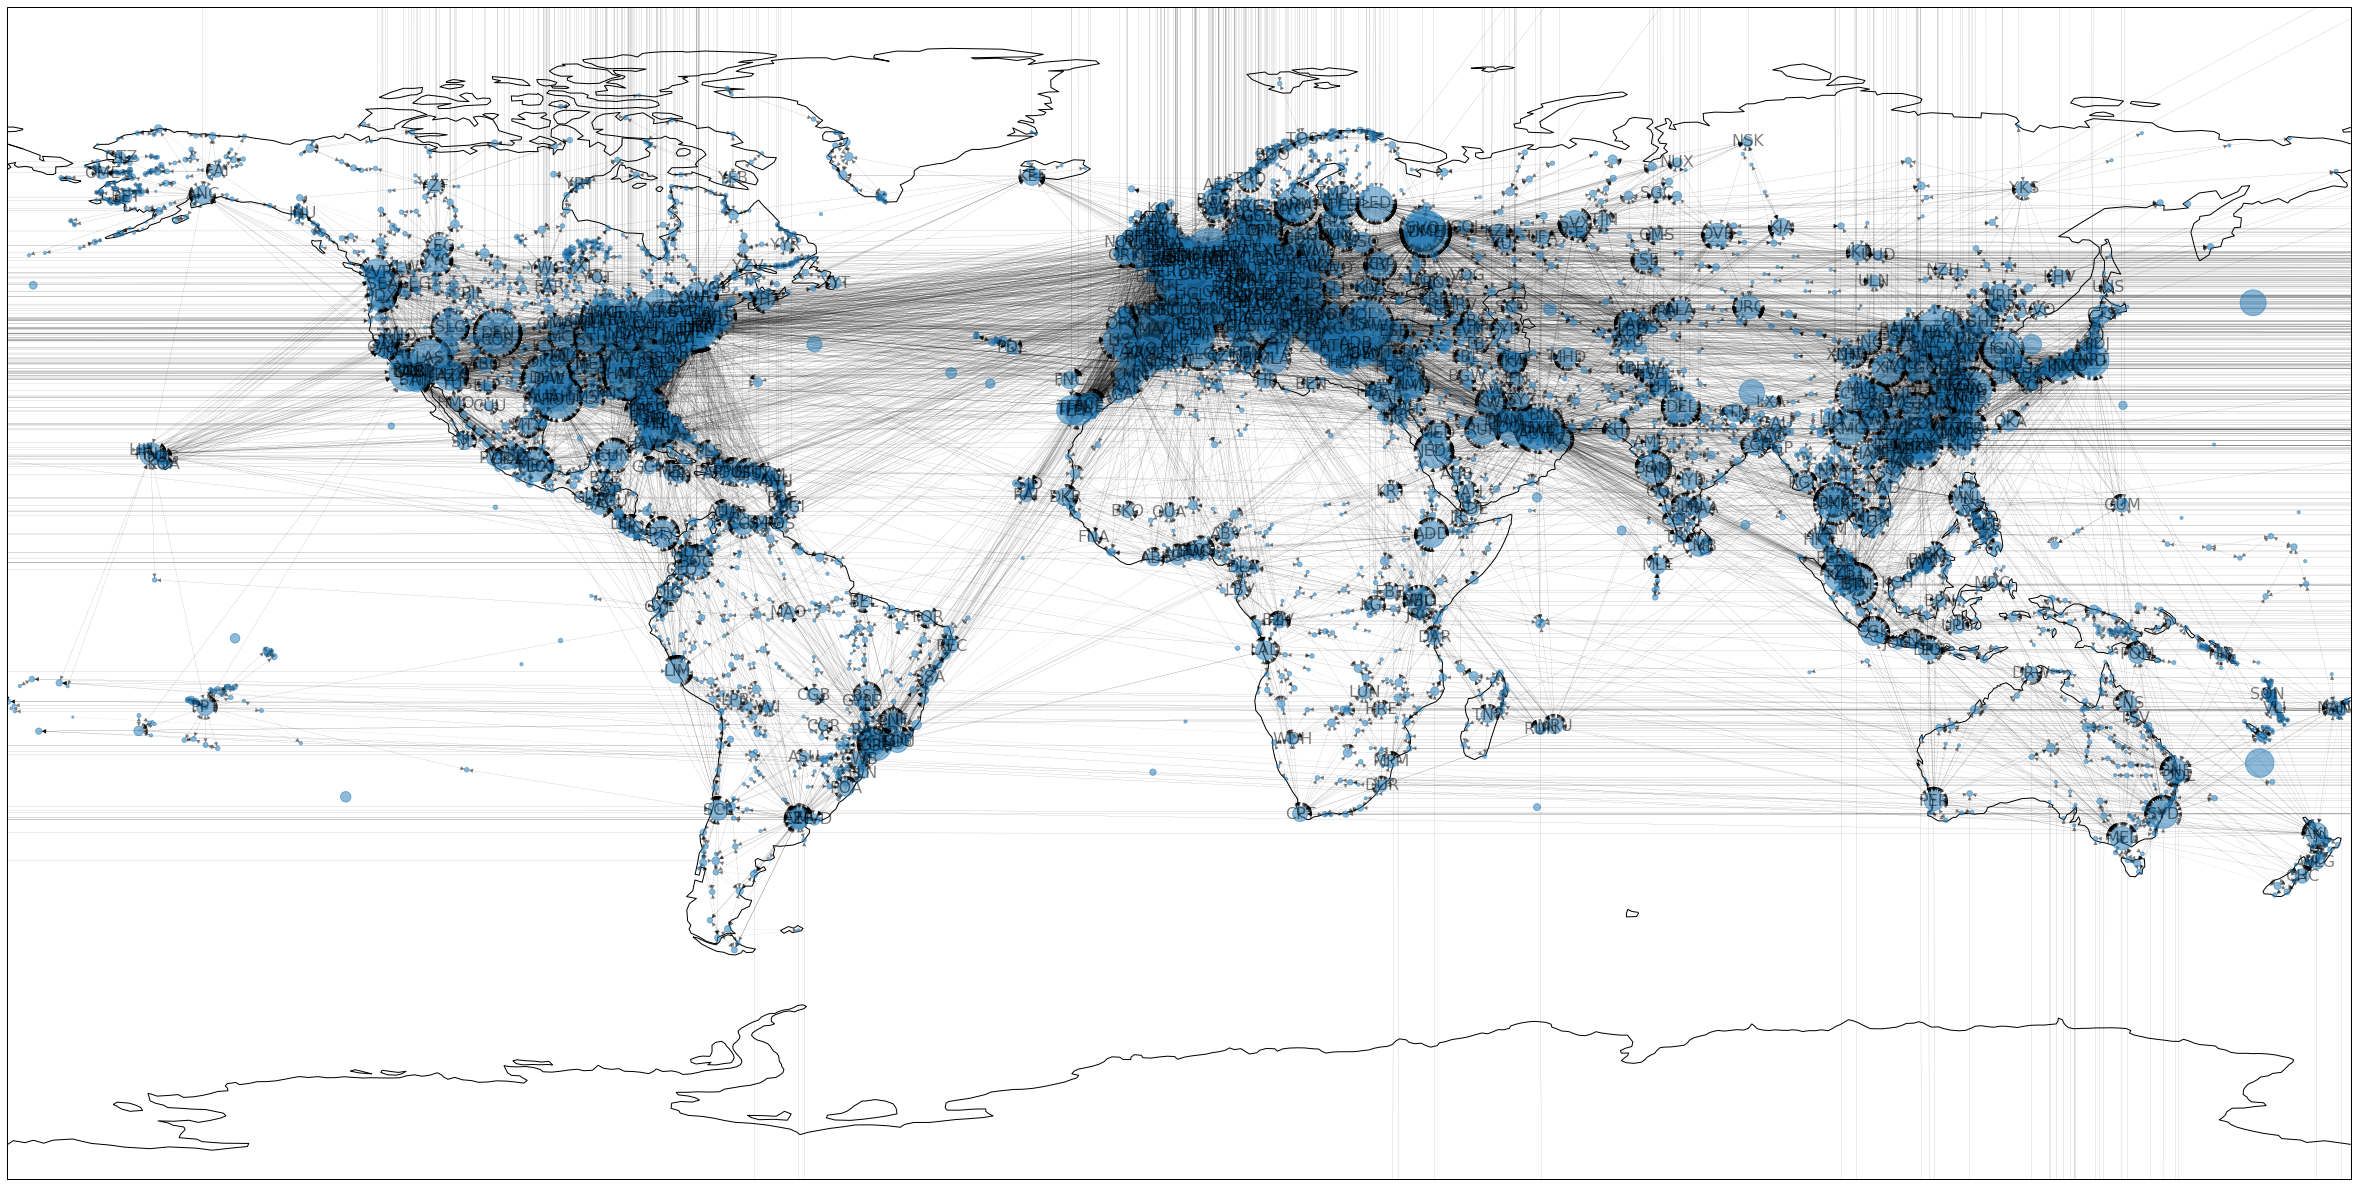

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

crs = ccrs.RotatedPole()
fig, ax = plt.subplots(
    1, 1, figsize=(42, 42),
    subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

nx.draw_networkx(graph, ax=ax,
                  font_size=16,
                  alpha=.5,
                  width=.075,
                  node_size=sizes,
                  labels=labels,
                  pos=pos,
                  cmap=plt.cm.autumn)

# Get only the brazilian airports and the domestic flights

In [5]:
br_airports = airports[airports.country == "Brazil"]
br_flights = flights[
    flights['airport'].isin(br_airports.iata) &
    flights['dest_airport'].isin(br_airports.iata)]
br_flights.reset_index()

,index,airline,airline_id,airport,airport_id,dest_airport,dest_airport_id,codeshare,stops,equipment
0,214,2Z,1729,AUX,7376,PMW,4214,NaN,0,AT7
1,215,2Z,1729,BRA,7373,BSB,2531,NaN,0,AT7
2,216,2Z,1729,BRA,7373,SSA,2621,NaN,0,AT7
3,217,2Z,1729,BSB,2531,BRA,7373,NaN,0,AT7
4,218,2Z,1729,BSB,2531,OPS,7367,NaN,0,AT7
5,219,2Z,1729,BSB,2531,RAO,2613,NaN,0,AT7
6,220,2Z,1729,CAC,2535,GRU,2564,NaN,0,AT7
7,221,2Z,1729,CGB,2548,GYN,2562,NaN,0,AT7
8,222,2Z,1729,CGB,2548,OPS,7367,NaN,0,AT7
9,223,2Z,1729,CGR,2538,DOU,7380,NaN,0,AT7


In [6]:
br_graph, pos, labels, sizes = mount_graph(br_flights, br_airports,0)
br_graph.nodes

NodeView(('AUX', 'PMW', 'BRA', 'BSB', 'SSA', 'OPS', 'RAO', 'CAC', 'GRU', 'CGB', 'GYN', 'CGR', 'DOU', 'GIG', 'UBA', 'UDI', 'VDC', 'PLU', 'SJP', 'CWB', 'POA', 'GNM', 'LAZ', 'AAX', 'POJ', 'AFL', 'AJU', 'MCZ', 'REC', 'VCP', 'AQA', 'ARU', 'ATM', 'BEL', 'STM', 'MAB', 'BAZ', 'MAO', 'CKS', 'CNF', 'FOR', 'IMP', 'MCP', 'BPS', 'SDU', 'BVB', 'BVH', 'BYO', 'CAW', 'CCM', 'CFB', 'JPR', 'LDB', 'MGF', 'OAL', 'PVH', 'ROO', 'CGH', 'CMG', 'CIZ', 'CLV', 'CPV', 'IPN', 'IZA', 'MOC', 'SLZ', 'VIX', 'PNZ', 'CXJ', 'IGU', 'ERN', 'TFF', 'FEN', 'NAT', 'FLN', 'JPA', 'PHB', 'THE', 'IOS', 'NVT', 'GVR', 'IRZ', 'ITB', 'JDO', 'JOI', 'JTC', 'MII', 'LEC', 'TUR', 'PIN', 'TBT', 'MEA', 'OLC', 'PAV', 'PET', 'PFB', 'SJK', 'RIA', 'XAP', 'PPB', 'RBR', 'RVD', 'SJL', 'TMT', 'CZS', 'ORX', 'BVS', 'MEU', 'CFC', 'JCB', 'GPB', 'ERM', 'GEL', 'SRA', 'URG', 'CDJ', 'CMP', 'GRP', 'MQH', 'OIA', 'RDC', 'STZ', 'SXO', 'SXX'))

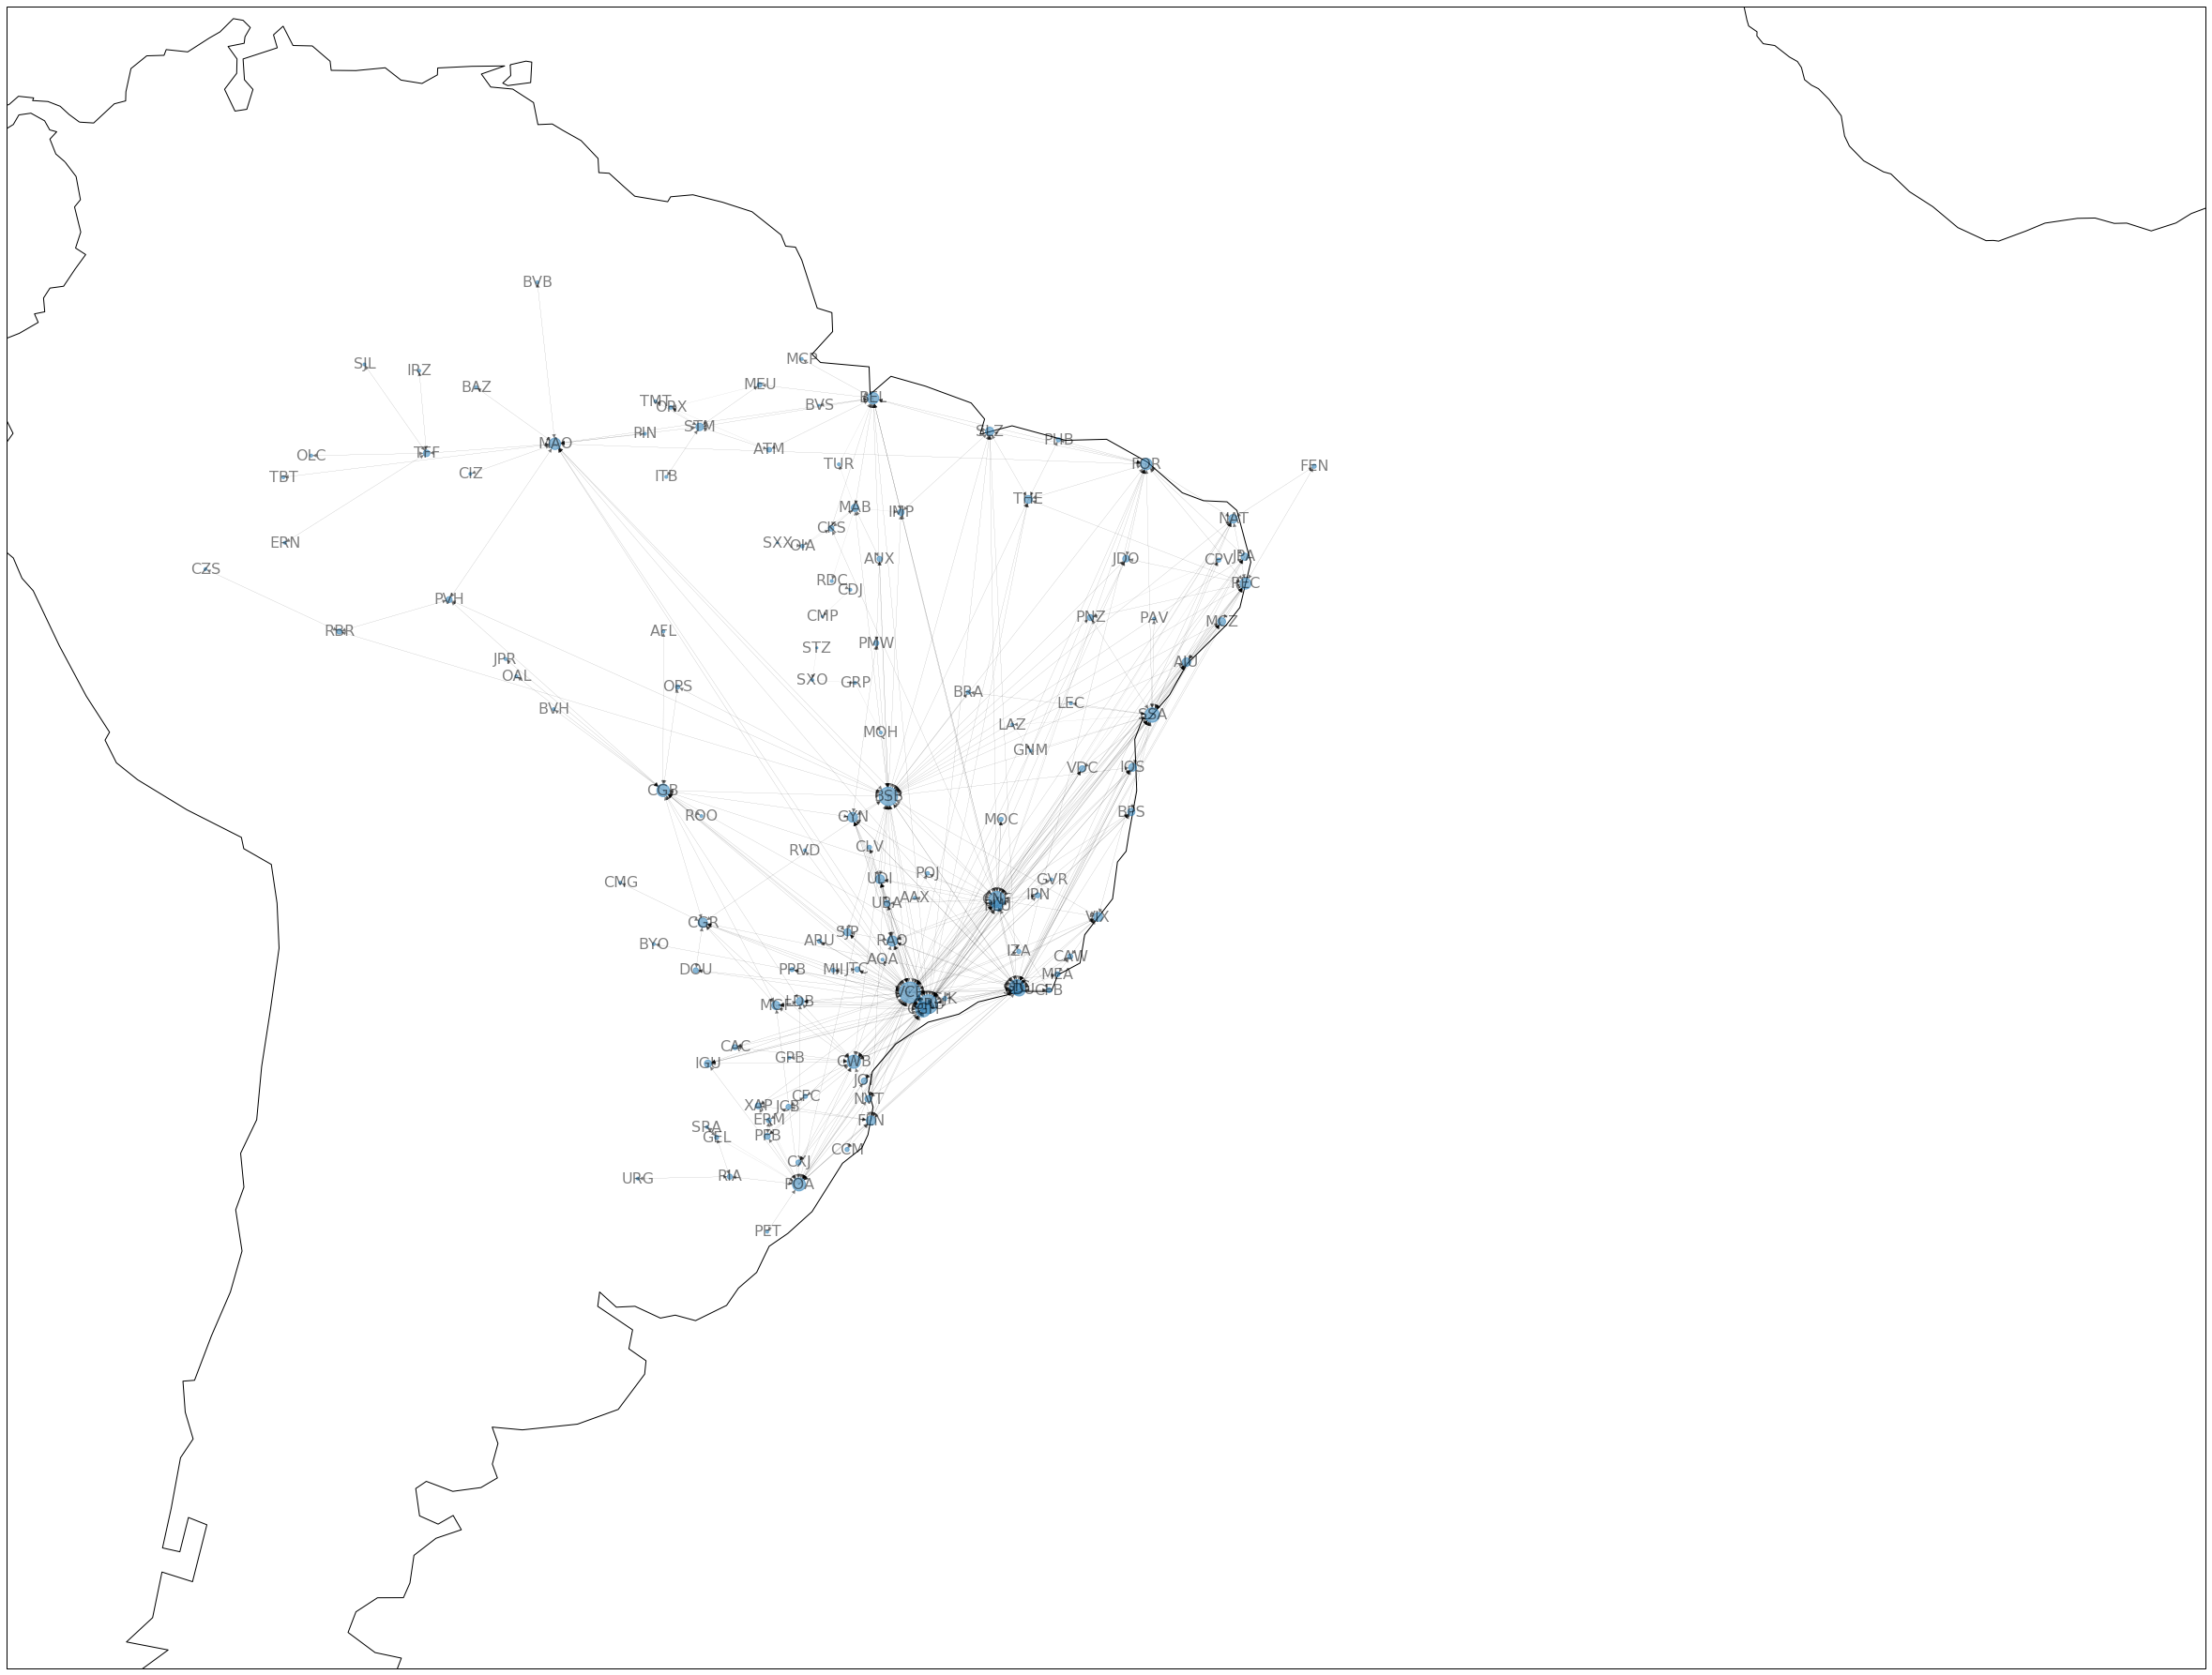

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

crs = ccrs.RotatedPole()
fig, ax = plt.subplots(
    1, 1, figsize=(42, 42),
    subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()
# # # Extent of continental Brazil.
ax.set_extent([-80, 0, -40, 10])
nx.draw_networkx(br_graph, ax=ax,
                  font_size=16,
                  alpha=.5,
                  width=.075,
                  node_size=sizes,
                  labels=labels,
                  pos=pos,
                  cmap=plt.cm.autumn)

In [8]:
def dfs(graph, visited, n):
    visited[n]= True
    for node in graph[n]:
        if not visited[node]:
            dfs(graph, visited, node)

In [9]:
def bfs(graph, visited, n): 
        queue = [] 
        queue.append(n)
        visited[n] = True
  
        while queue: 
            s = queue.pop(0) 
            print (s, end = " ") 
  
            for i in graph.neighbors(s): 
                if visited[i] == False: 
                    queue.append(i) 
                    visited[i] = True

In [10]:
def transpose_graph(graph):
    transposed_graph = nx.Graph()
    for i in graph.nodes:
        for j in graph[i]: 
            transposed_graph.add_edge(j,i)
    return transposed_graph

In [11]:
def is_strongly_connected(graph, visited):
    dfs(graph, visited, 'BSB')
    print([i for i in visited if visited[i] ==False])
    if any(n == False for n in visited.values()):
        return False
    
    tg = transpose_graph(graph)

    visited = {n: False  for n in graph.nodes} 

    dfs(tg,visited,'BSB') 

    if any(i == False for i in visited.values()): 
        return False

    return True

In [12]:
visited = {n: False for n in br_graph.nodes}

print(is_strongly_connected(br_graph, visited))

['GRP', 'MQH', 'STZ', 'SXO', 'SXX']
False
